### **INF2178 Final Project (Group 33)**


## **Part 1 Cleaning Data**

**Importing Packages and Data**

In [135]:
#Packages
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as stats
import numpy as np
from numpy import var,mean,sqrt
import seaborn as sns
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import statsmodels.api as sm
import math
import statsmodels.stats.power as smp
from statsmodels.stats.power import TTestIndPower
%matplotlib inline 
import statsmodels
!pip install pingouin
from pingouin import ancova
from statsmodels.stats.power import TTestIndPower
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
pd.options.display.max_columns = None #show all columns in data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [136]:
url='https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv'
df=pd.read_csv(url)
df.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

In [138]:
df.nunique()

Arrest_Year                            2
Arrest_Month                           4
EventID                            60003
ArrestID                           64805
PersonID                           37347
Perceived_Race                         8
Sex                                    3
Age_group__at_arrest_                  9
Youth_at_arrest__under_18_years        3
ArrestLocDiv                          18
StripSearch                            2
Booked                                 2
Occurrence_Category                   31
Actions_at_arrest___Concealed_i        2
Actions_at_arrest___Combative__        2
Actions_at_arrest___Resisted__d        2
Actions_at_arrest___Mental_inst        2
Actions_at_arrest___Assaulted_o        2
Actions_at_arrest___Cooperative        2
SearchReason_CauseInjury               2
SearchReason_AssistEscape              2
SearchReason_PossessWeapons            2
SearchReason_PossessEvidence           2
ItemsFound                             2
ObjectId        

In [139]:
print(df.columns)

Index(['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID',
       'Perceived_Race', 'Sex', 'Age_group__at_arrest_',
       'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'StripSearch',
       'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury',
       'SearchReason_AssistEscape', 'SearchReason_PossessWeapons',
       'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId'],
      dtype='object')


**Cleaning Data**

In [140]:
# Collecting variables we need 
grouped_df = df.groupby('PersonID').agg({'PersonID': 'count', 'StripSearch': 'sum', 'ItemsFound':'sum'})
grouped_df.columns = ['#Arrests', '#StripSearch', '#ItemsFound']
grouped_df

,#Arrests,#StripSearch,#ItemsFound
PersonID,,,
300000,1,0,0.0
300001,1,0,0.0
300002,1,0,0.0
300003,8,1,0.0
300004,1,0,0.0
...,...,...,...
337342,5,0,0.0
337343,1,0,0.0
337344,1,1,0.0


In [141]:
grouped_df['#ItemsFound'].unique()

array([ 0.,  1.,  3.,  2.,  5.,  4.,  6.,  7.,  8., 13.,  9.])

In [142]:
grouped_df['#StripSearch'].unique()

array([ 0,  1,  2,  3,  6,  5,  4,  8, 10,  9, 13,  7, 17, 11, 12])

In [143]:
grouped_df['#Arrests'].unique()

array([ 1,  8,  2,  4,  3, 10,  5,  7, 15,  9,  6, 25, 14, 20, 11, 21, 12,
       16, 30, 13, 19, 22, 17, 18, 39, 26, 24, 31, 27, 23, 41, 32, 28, 29,
       54, 35, 46])

In [144]:
#Combining dataframes
combined_df=grouped_df.merge(df,on='PersonID')
combined_df.head (5)


,PersonID,#Arrests,#StripSearch,#ItemsFound,Arrest_Year,Arrest_Month,EventID,ArrestID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,300000,1,0,0.0,2020,July-Sept,1042835,6031555.0,East/Southeast Asian,M,Aged 35 to 44 years,Not a youth,XX,0,0,Vehicle Related (inc. Impaired),0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,16373
1,300001,1,0,0.0,2020,Jan-Mar,1013133,6002148.0,White,F,Aged 17 years and younger,Youth (aged 17 and younger),51,0,1,"FTA/FTC, Compliance Check & Parollee",0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,38253
2,300002,1,0,0.0,2020,Apr-June,1008622,6016704.0,White,M,Aged 35 to 44 years,Not a youth,XX,0,0,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,55324
3,300003,8,1,0.0,2020,Apr-June,1058473,6060061.0,White,M,Aged 25 to 34 years,Not a youth,52,1,1,Mischief & Fraud,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,55641
4,300003,8,1,0.0,2020,Apr-June,1005610,6063514.0,White,M,Aged 25 to 34 years,Not a youth,XX,0,0,Other Statute & Other Incident Type,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,55642


In [145]:
#Simplify age group
combined_df=(combined_df.replace(to_replace=["Aged 17 years and under","Aged 17 years and younger",
                                             "Aged 18 to 24 years","Aged 25 to 34 years","Aged 35 to 44 years",
                                             "Aged 45 to 54 years","Aged 55 to 64 years","Aged 65 and older","Aged 65 years and older"],
                                 value=["<=17","<=17","18-24","25-34","35-44","45-54","55-64",">=64",">=64"]))

In [146]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65276 entries, 0 to 65275
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PersonID                         65276 non-null  int64  
 1   #Arrests                         65276 non-null  int64  
 2   #StripSearch                     65276 non-null  int64  
 3   #ItemsFound                      65276 non-null  float64
 4   Arrest_Year                      65276 non-null  int64  
 5   Arrest_Month                     65276 non-null  object 
 6   EventID                          65276 non-null  int64  
 7   ArrestID                         64807 non-null  float64
 8   Perceived_Race                   65272 non-null  object 
 9   Sex                              65276 non-null  object 
 10  Age_group__at_arrest_            65252 non-null  object 
 11  Youth_at_arrest__under_18_years  65276 non-null  object 
 12  ArrestLocDiv      

In [147]:
combined_df.nunique()

PersonID                           37347
#Arrests                              37
#StripSearch                          15
#ItemsFound                           11
Arrest_Year                            2
Arrest_Month                           4
EventID                            60003
ArrestID                           64805
Perceived_Race                         8
Sex                                    3
Age_group__at_arrest_                  7
Youth_at_arrest__under_18_years        3
ArrestLocDiv                          18
StripSearch                            2
Booked                                 2
Occurrence_Category                   31
Actions_at_arrest___Concealed_i        2
Actions_at_arrest___Combative__        2
Actions_at_arrest___Resisted__d        2
Actions_at_arrest___Mental_inst        2
Actions_at_arrest___Assaulted_o        2
Actions_at_arrest___Cooperative        2
SearchReason_CauseInjury               2
SearchReason_AssistEscape              2
SearchReason_Pos

In [148]:
combined_df.isnull().sum()

PersonID                               0
#Arrests                               0
#StripSearch                           0
#ItemsFound                            0
Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_Pos

In [150]:
combined_df['StripSearch'].value_counts()

0    57475
1     7801
Name: StripSearch, dtype: int64

# **Part 2 EDA**

In [18]:
#Description data 
combined_df.describe()

,PersonID,#Arrests,#StripSearch,#ItemsFound,Arrest_Year,EventID,ArrestID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
count,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,6.527600e+04,6.480700e+04,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,65276.000000
mean,318599.919695,4.133096,0.728813,0.271647,2020.510096,1.029998e+06,6.032402e+06,0.119508,0.519502,0.004075,0.044136,0.038330,0.033381,0.006358,0.445937,0.765671,0.343161,0.453403,0.418921,0.373157,32638.500000
std,10815.387928,5.402883,1.630969,0.865821,0.499902,1.731809e+04,1.870751e+04,0.324388,0.499623,0.063706,0.205398,0.191992,0.179632,0.079481,0.497072,0.423606,0.474795,0.497856,0.493414,0.483674,18843.702423
min,300000.000000,1.000000,0.000000,0.000000,2020.000000,1.000000e+06,6.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,309215.000000,1.000000,0.000000,0.000000,2020.000000,1.015001e+06,6.016202e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16319.750000
50%,318595.500000,2.000000,0.000000,0.000000,2021.000000,1.030006e+06,6.032402e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32638.500000
75%,327926.250000,5.000000,1.000000,0.000000,2021.000000,1.044996e+06,6.048602e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48957.250000
max,337346.000000,54.000000,17.000000,13.000000,2021.000000,1.060002e+06,6.064804e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65276.000000


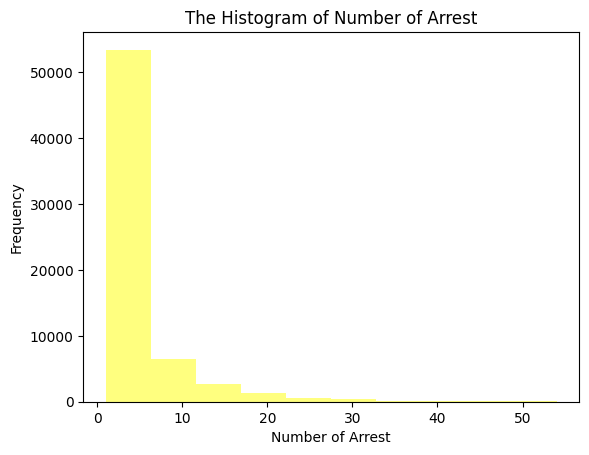

In [19]:
# The Histogram of Number of Arrest
plt.hist(combined_df['#Arrests'],alpha=0.5,color='yellow')
plt.xlabel('Number of Arrest')
plt.ylabel('Frequency')
plt.title('The Histogram of Number of Arrest')
plt.show()

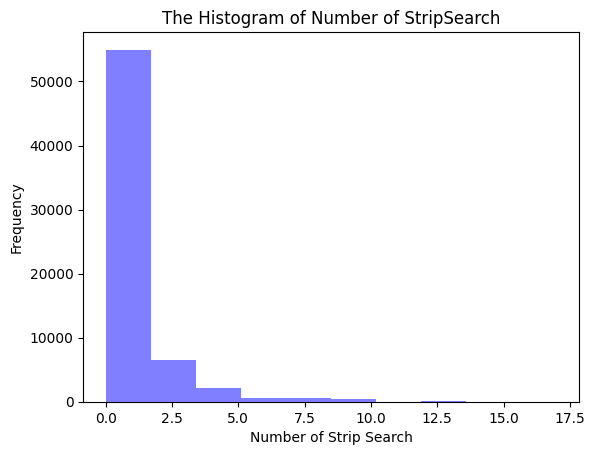

In [20]:
# The Histogram of Number of StripSearch
plt.hist(combined_df['#StripSearch'],alpha=0.5,color='blue')
plt.xlabel('Number of Strip Search')
plt.ylabel('Frequency')
plt.title('The Histogram of Number of StripSearch')
plt.show()

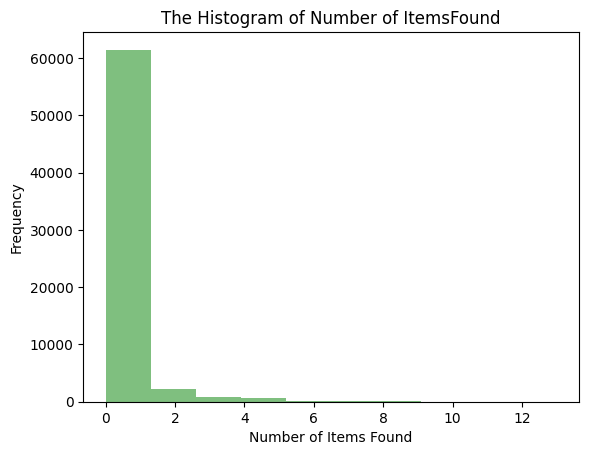

In [21]:
# The Histogram of Number of Itemfound
plt.hist(combined_df['#ItemsFound'],alpha=0.5,color='green')
plt.xlabel('Number of Items Found')
plt.ylabel('Frequency')
plt.title('The Histogram of Number of ItemsFound')
plt.show()

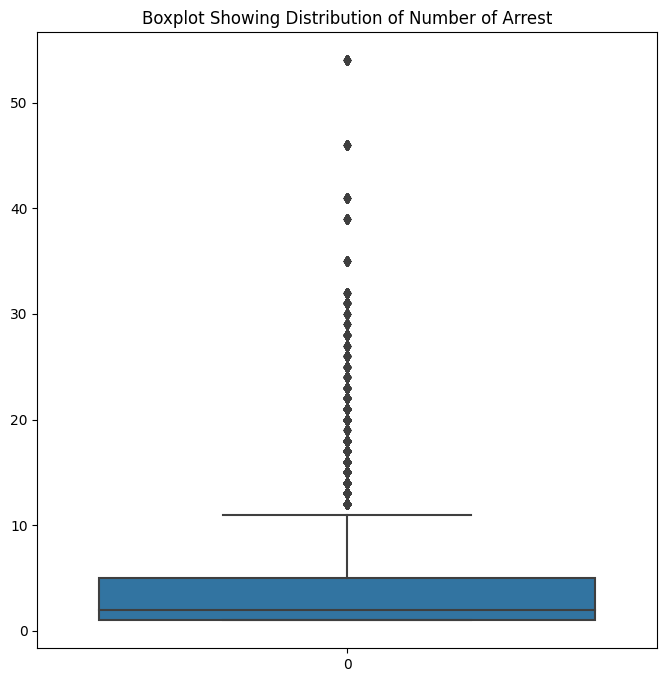

In [22]:
#Boxplot of arrest
plt.figure(figsize=(8,8))
sns.boxplot(data=combined_df['#Arrests'])
plt.title('Boxplot Showing Distribution of Number of Arrest')
plt.show()


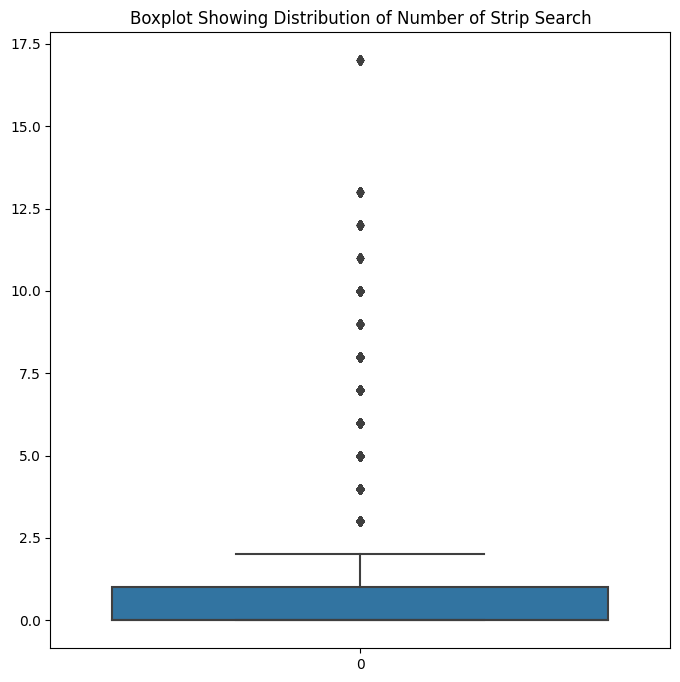

In [23]:
#Boxplot of arrest
plt.figure(figsize=(8,8))
sns.boxplot(data=combined_df['#StripSearch'])
plt.title('Boxplot Showing Distribution of Number of Strip Search')
plt.show()

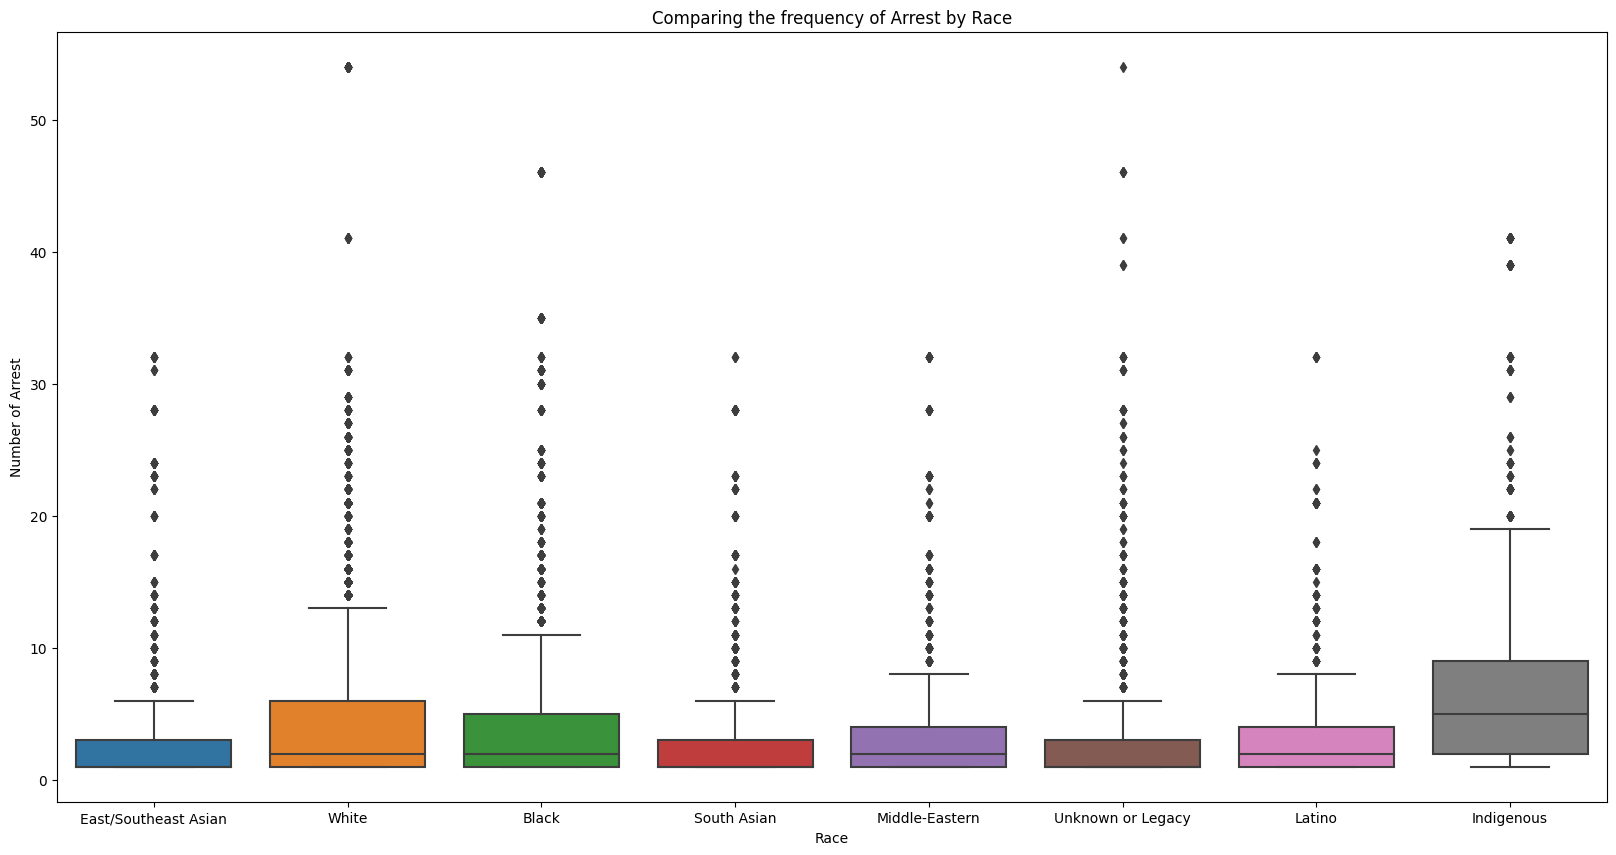

In [24]:
#Comparing race with arrest
plt.figure(figsize=(20,10))
sns.boxplot(x='Perceived_Race', y='#Arrests',data=combined_df)
plt.title('Comparing the frequency of Arrest by Race')
plt.xlabel('Race')
plt.ylabel('Number of Arrest')
plt.show()

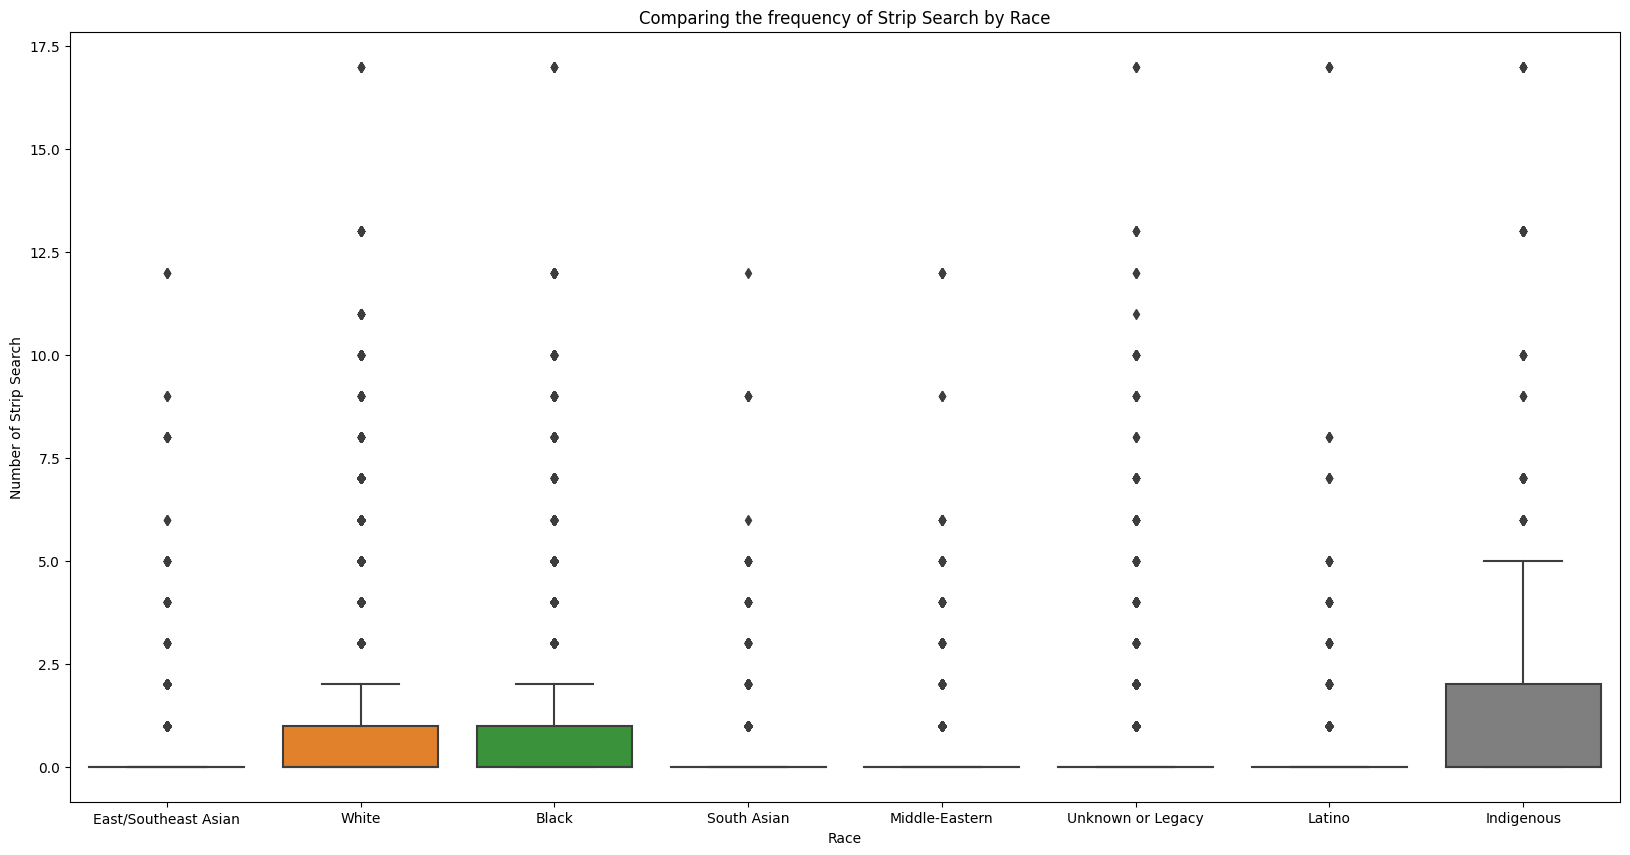

In [25]:
#Comparing race with strip search
plt.figure(figsize=(20,10))
sns.boxplot(x='Perceived_Race', y='#StripSearch',data=combined_df)
plt.title('Comparing the frequency of Strip Search by Race')
plt.xlabel('Race')
plt.ylabel('Number of Strip Search')
plt.show()

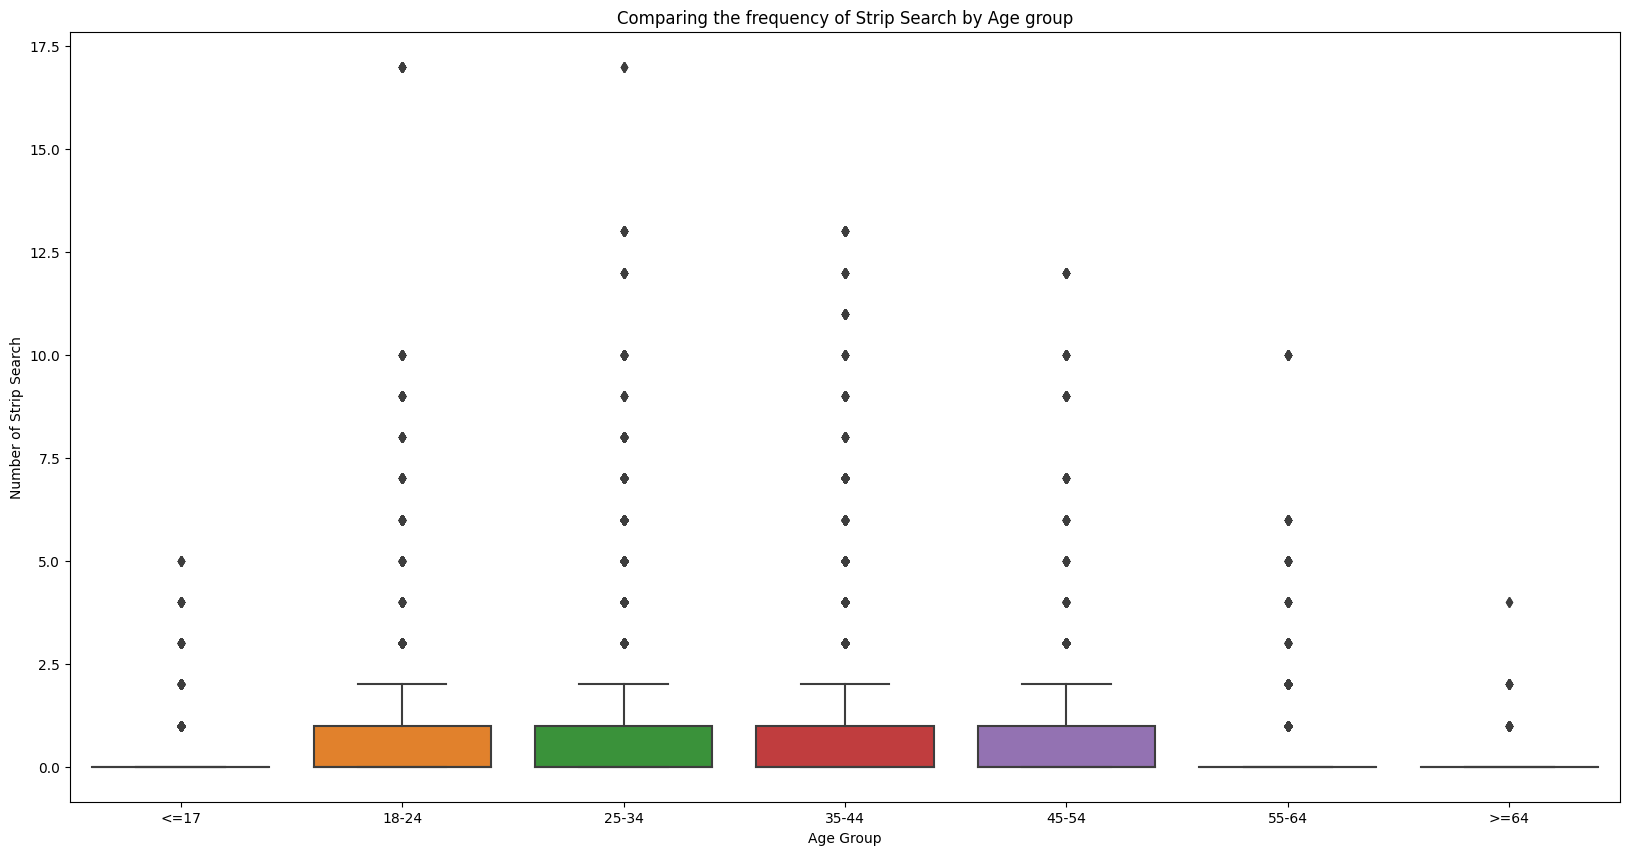

In [26]:
#Comparing age with strip search
plt.figure(figsize=(20,10))
sns.boxplot(x='Age_group__at_arrest_', y='#StripSearch',order=['<=17','18-24','25-34','35-44','45-54','55-64','>=64'],data=combined_df)
plt.title('Comparing the frequency of Strip Search by Age group')
plt.xlabel('Age Group')
plt.ylabel('Number of Strip Search')
plt.show()

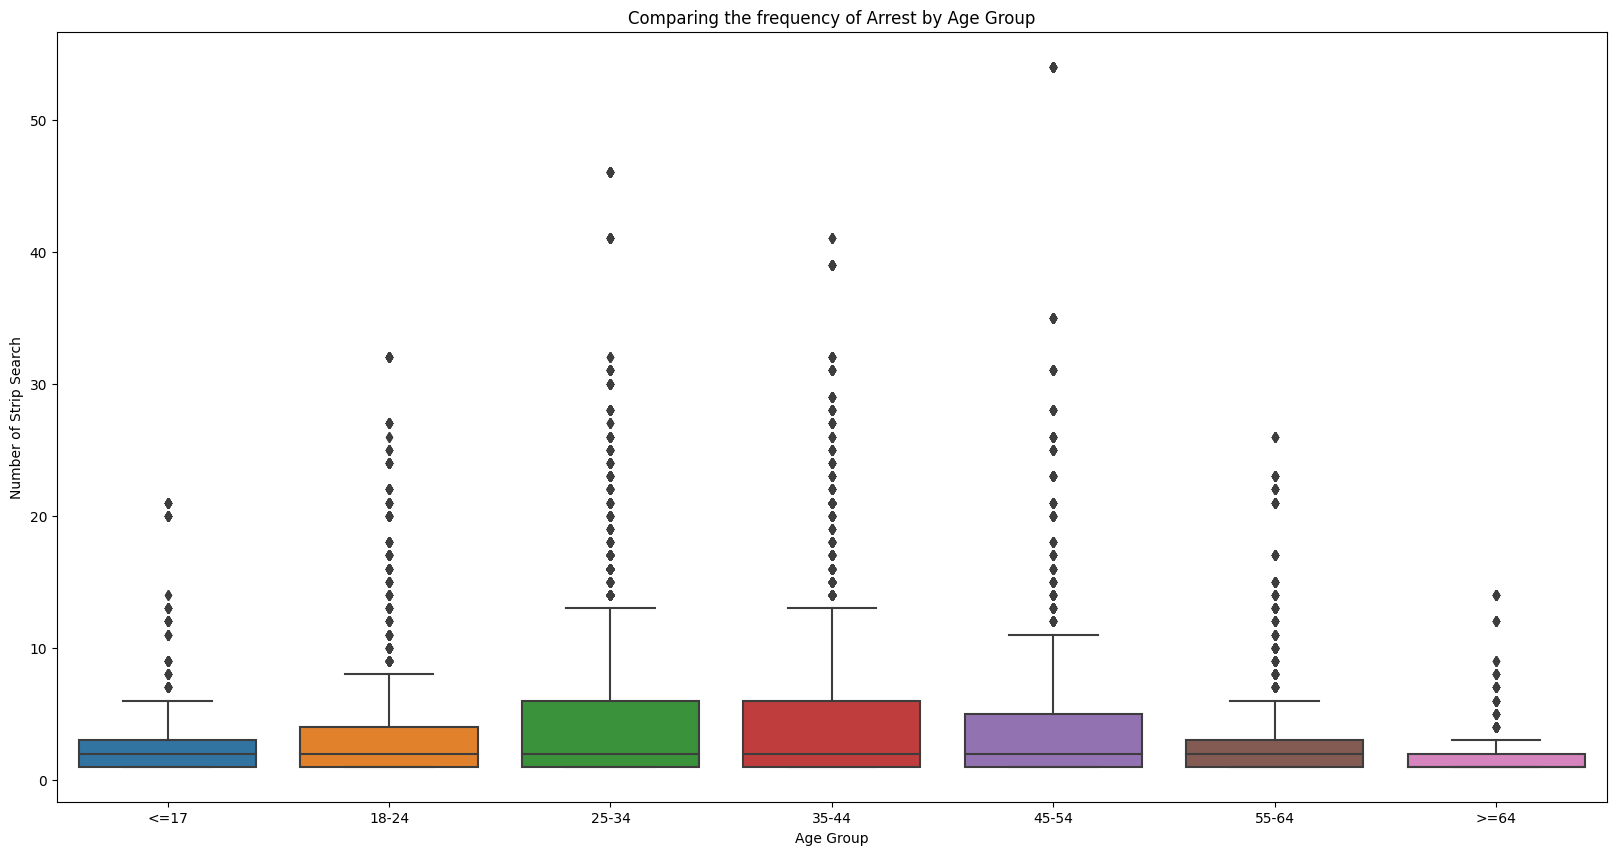

In [27]:
#Comparing age with arrest
plt.figure(figsize=(20,10))
sns.boxplot(x='Age_group__at_arrest_', y='#Arrests',order=['<=17','18-24','25-34','35-44','45-54','55-64','>=64'],data=combined_df)
plt.title('Comparing the frequency of Arrest by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Strip Search')
plt.show()

[Text(0.5, 1.0, 'Number of Arrests by Age Group')]

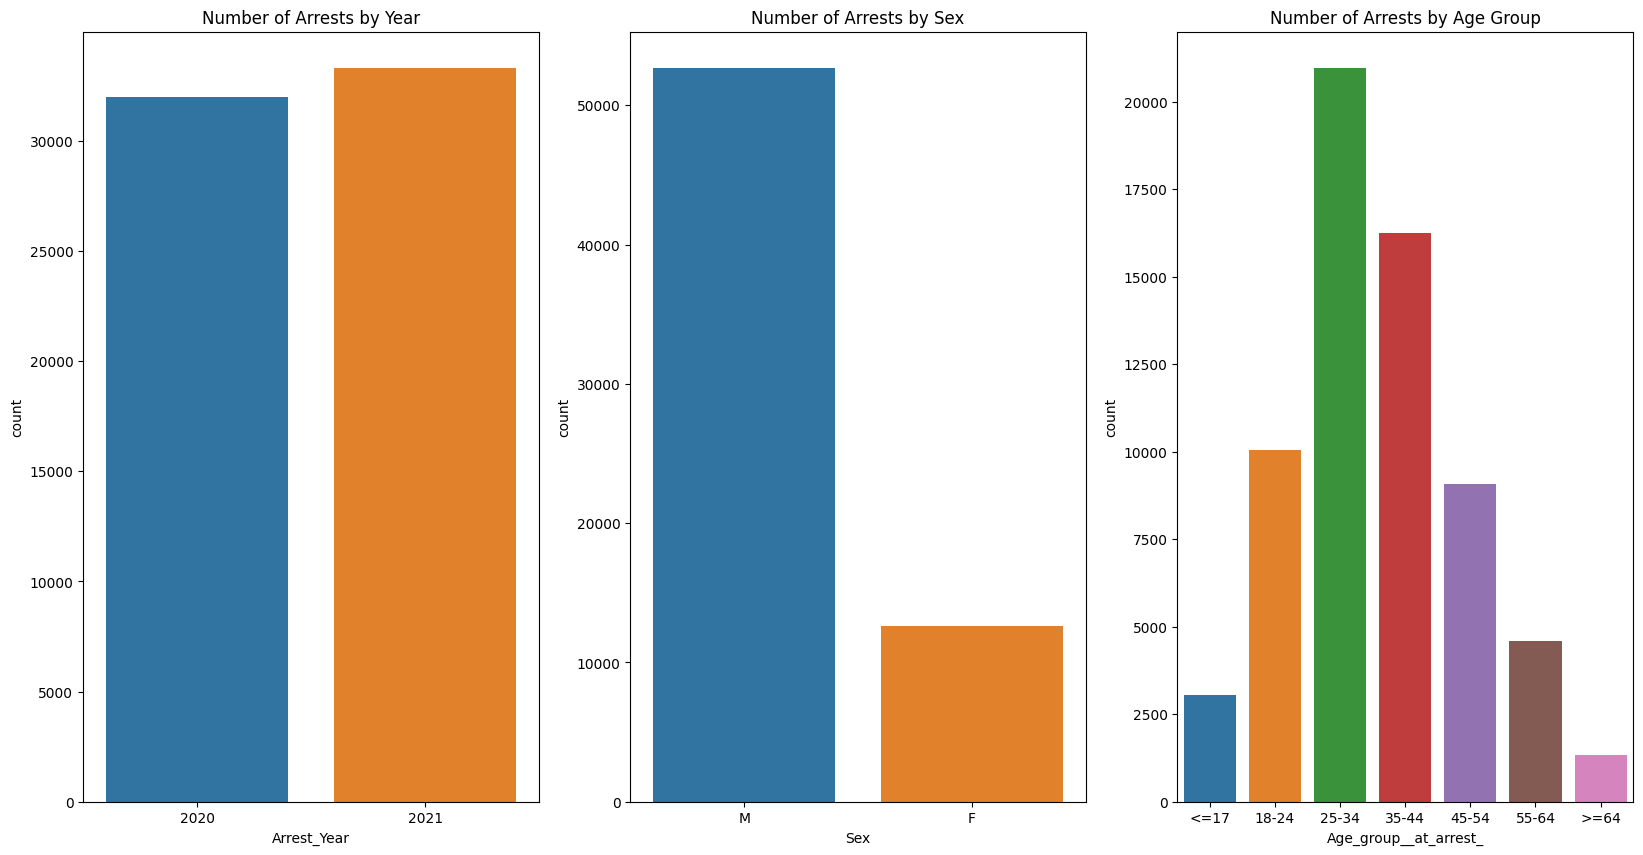

In [28]:
#Number of arrests by year,sex,age group
fig,ax=plt.subplots(1,3,figsize=[20,10])
sns.countplot(x='Arrest_Year',data=combined_df,ax=ax[0]).set(title='Number of Arrests by Year')
sns.countplot(x='Sex',data=combined_df,order=['M','F'],ax=ax[1]).set(title='Number of Arrests by Sex')
sns.countplot(x='Age_group__at_arrest_',data=combined_df,order=['<=17','18-24','25-34','35-44','45-54','55-64','>=64'],ax=ax[2]).set(title='Number of Arrests by Age Group')



[Text(0.5, 1.0, 'Number of Arrests by Race')]

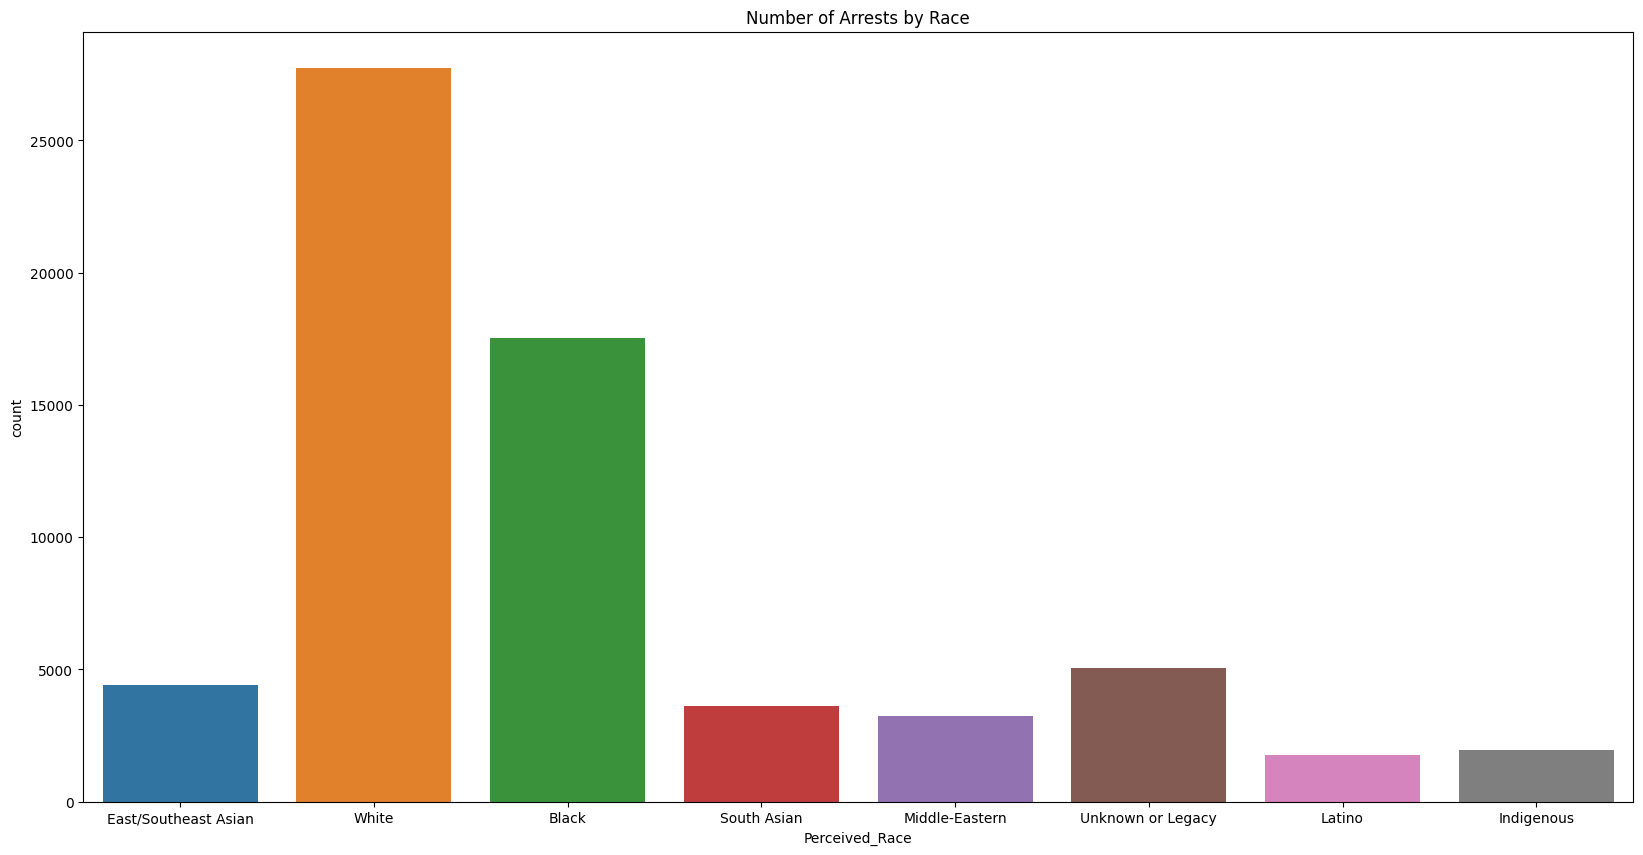

In [29]:
#Number of arrests by race
fig,ax=plt.subplots(figsize=[20,10])
sns.countplot(x='Perceived_Race',data=combined_df,ax=ax).set(title='Number of Arrests by Race')

[Text(0.5, 1.0, 'Number of Strip Search by Age Group')]

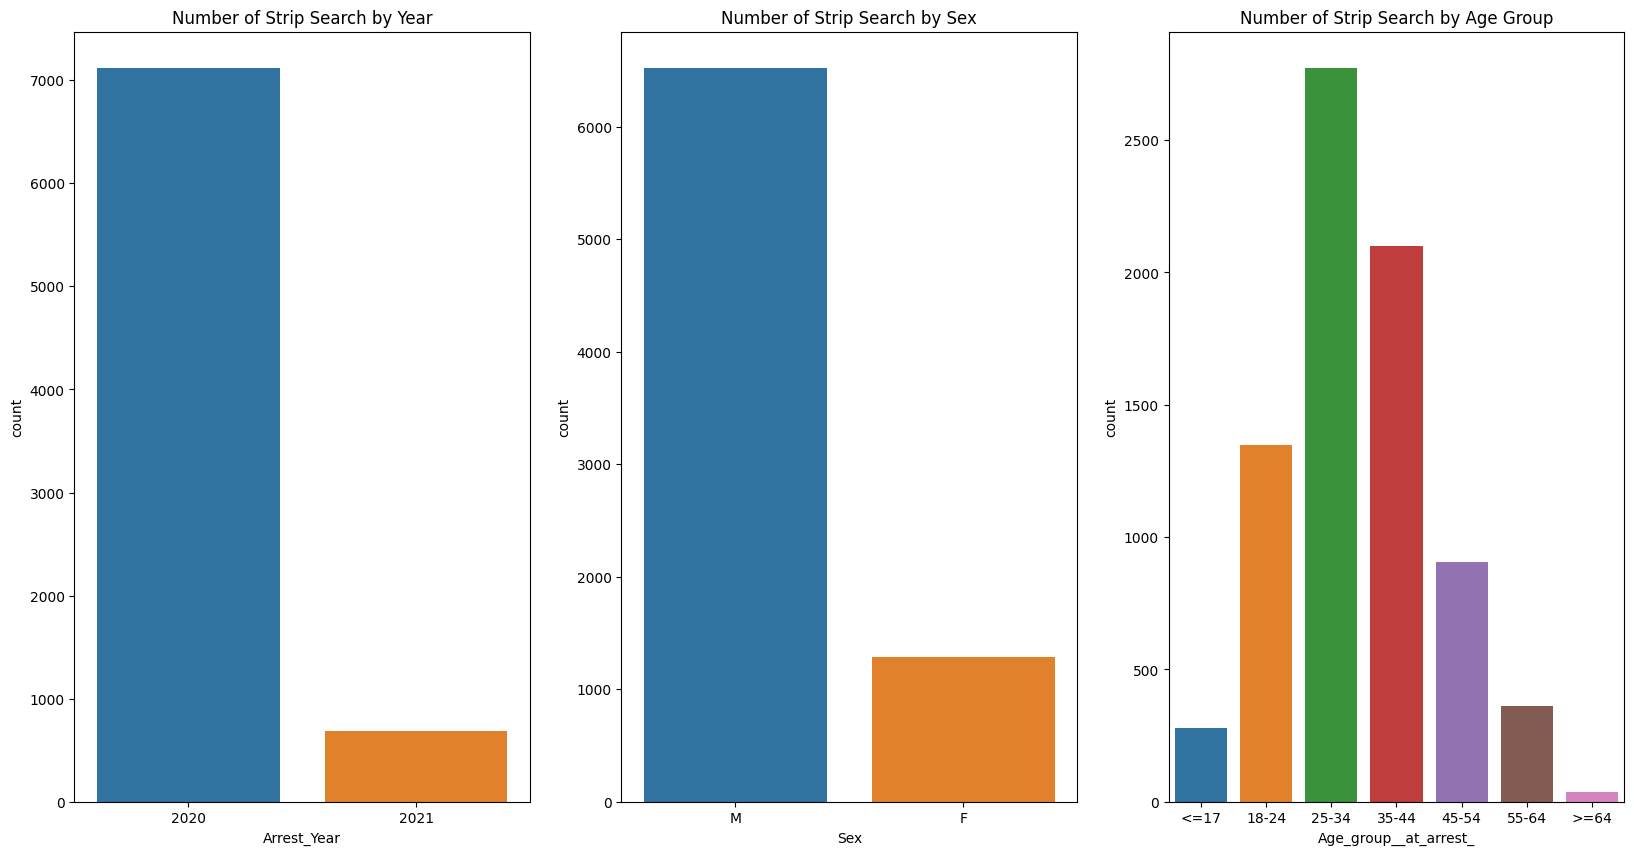

In [30]:
#Number of strip search by year,sex,age group
fig,ax=plt.subplots(1,3,figsize=[20,10])
sns.countplot(x='Arrest_Year',data=combined_df[combined_df['StripSearch']==1],ax=ax[0]).set(title='Number of Strip Search by Year')
sns.countplot(x='Sex',data=combined_df[combined_df['StripSearch']==1],order=['M','F'],ax=ax[1]).set(title='Number of Strip Search by Sex')
sns.countplot(x='Age_group__at_arrest_',data=combined_df[combined_df['StripSearch']==1],order=['<=17','18-24','25-34','35-44','45-54','55-64','>=64'],ax=ax[2]).set(title='Number of Strip Search by Age Group')



[Text(0.5, 1.0, 'Number of Strip Search by Race')]

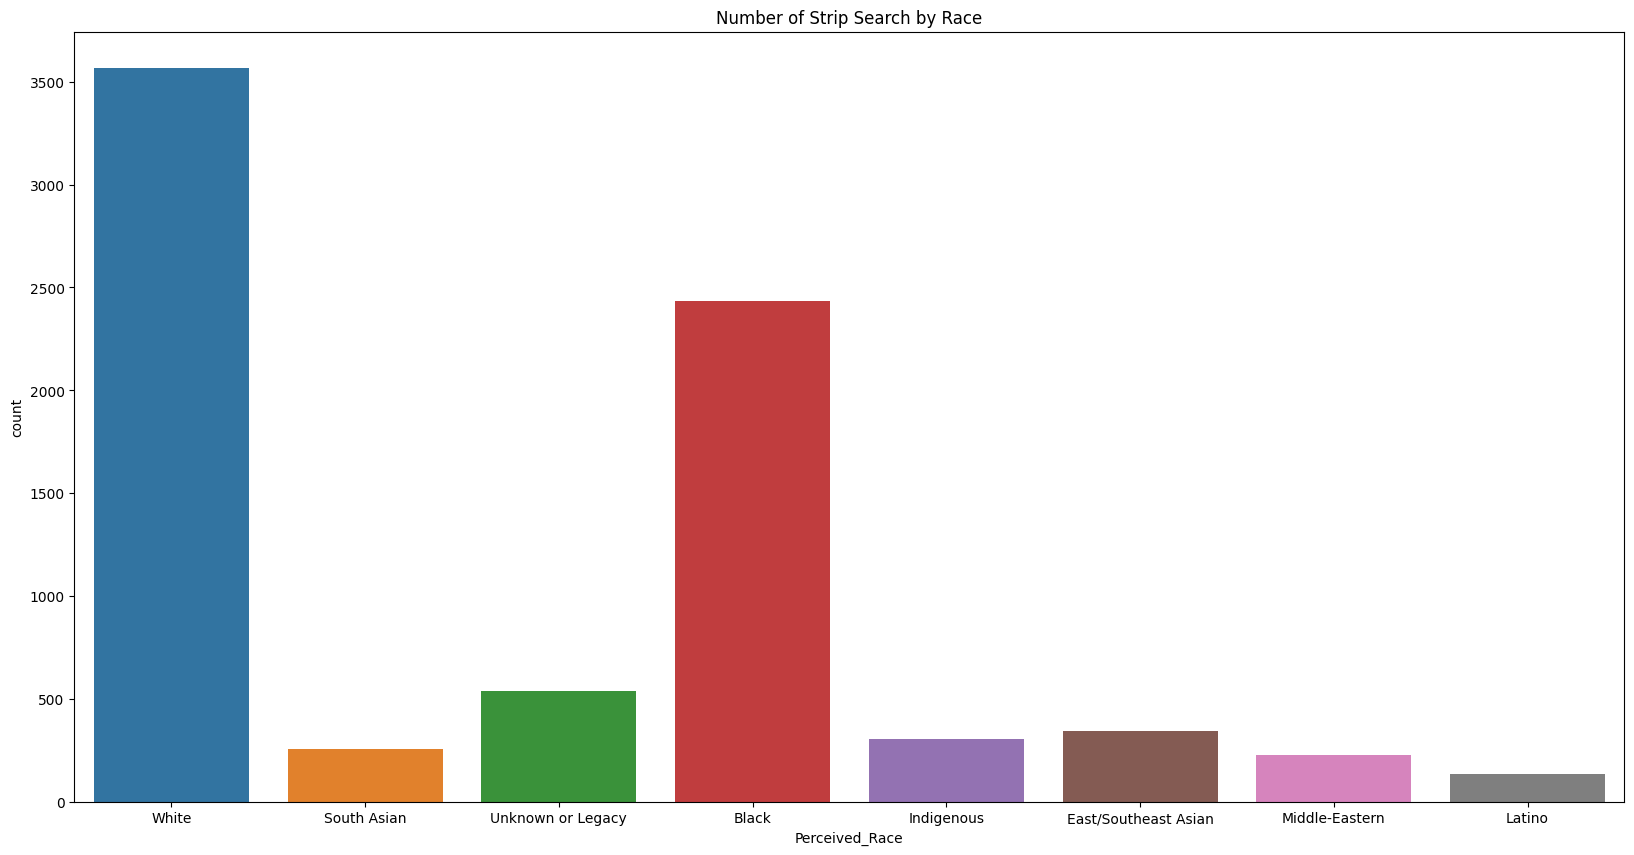

In [31]:
#Number of strip search by race
fig,ax=plt.subplots(figsize=[20,10])
sns.countplot(x='Perceived_Race',data=combined_df[combined_df['StripSearch']==1],ax=ax).set(title='Number of Strip Search by Race')

[Text(0.5, 1.0, 'Number of Items found in Srtip Search')]

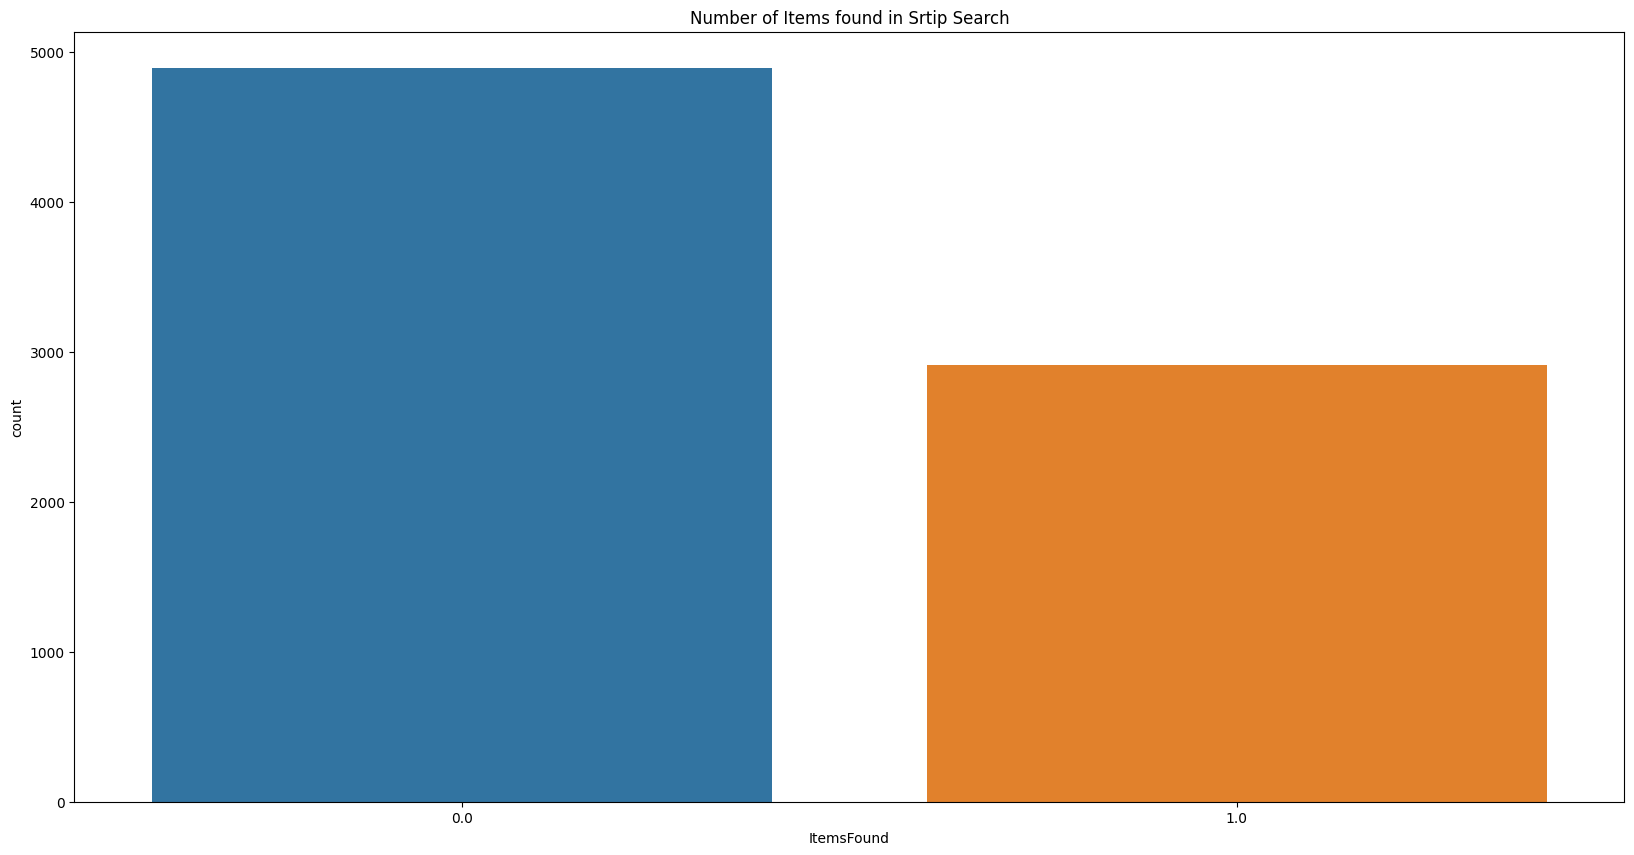

In [32]:
#Iteam found in strip search
fig,ax=plt.subplots(figsize=[20,10])
sns.countplot(x='ItemsFound',data=combined_df[combined_df['StripSearch']==1],ax=ax).set(title='Number of Items found in Srtip Search')


In [33]:
combined_df.head(10)

,PersonID,#Arrests,#StripSearch,#ItemsFound,Arrest_Year,Arrest_Month,EventID,ArrestID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,300000,1,0,0.0,2020,July-Sept,1042835,6031555.0,East/Southeast Asian,M,35-44,Not a youth,XX,0,0,Vehicle Related (inc. Impaired),0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,16373
1,300001,1,0,0.0,2020,Jan-Mar,1013133,6002148.0,White,F,<=17,Youth (aged 17 and younger),51,0,1,"FTA/FTC, Compliance Check & Parollee",0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,38253
2,300002,1,0,0.0,2020,Apr-June,1008622,6016704.0,White,M,35-44,Not a youth,XX,0,0,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,55324
3,300003,8,1,0.0,2020,Apr-June,1058473,6060061.0,White,M,25-34,Not a youth,52,1,1,Mischief & Fraud,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,55641
4,300003,8,1,0.0,2020,Apr-June,1005610,6063514.0,White,M,25-34,Not a youth,XX,0,0,Other Statute & Other Incident Type,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,55642
5,300003,8,1,0.0,2020,Apr-June,1040167,6011108.0,White,M,25-34,Not a youth,22,0,1,Warrant,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,55643
6,300003,8,1,0.0,2020,July-Sept,1019296,6041043.0,White,M,25-34,Not a youth,22,0,1,Other Offence,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,55644
7,300003,8,1,0.0,2021,Apr-June,1002949,6011541.0,White,M,25-34,Not a youth,22,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,55645
8,300003,8,1,0.0,2021,July-Sept,1023385,6034005.0,White,M,25-34,Not a youth,XX,0,1,Drug Related,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,55646
9,300003,8,1,0.0,2021,Oct-Dec,1059101,6009523.0,White,M,35-44,Not a youth,XX,0,0,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,55647


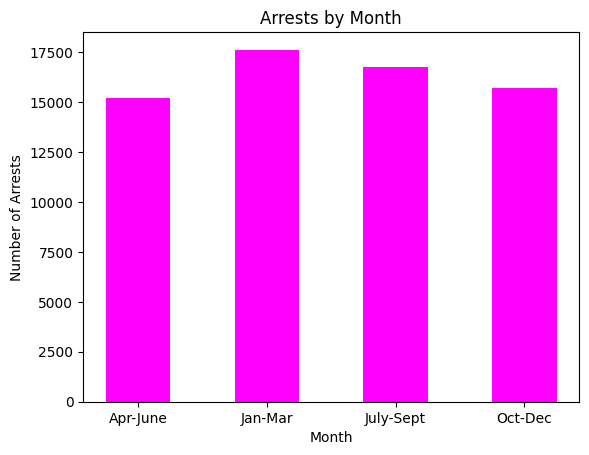

In [34]:
# Group arrests by month
arrests_by_month = combined_df.groupby('Arrest_Month').size().reset_index(name='ArrestID')

# Create bar chart
plt.bar(arrests_by_month['Arrest_Month'], arrests_by_month['ArrestID'], color='fuchsia' ,width=0.5)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Arrests')
plt.title('Arrests by Month')

# Display chart
plt.show()

<ipython-input-35-3233078004f6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ItemsFoundOrStripSearched'] = df['ItemsFound'] + df['StripSearch']


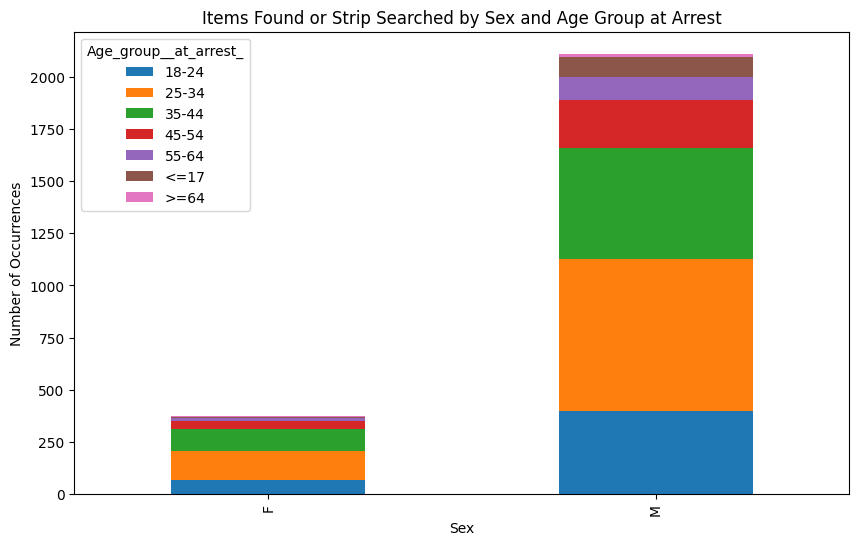

In [35]:
# Filter out rows where SearchReason_PossessWeapons is 1 or SearchReason_PossessEvidence is 1
df = combined_df[(combined_df['SearchReason_PossessWeapons'] == 1) | (combined_df['SearchReason_PossessEvidence'] == 1)]

# Create a new column 'ItemsFoundOrStripSearched' to count the number of times an item was found or a strip search was conducted
df['ItemsFoundOrStripSearched'] = df['ItemsFound'] + df['StripSearch']

# Group data by Sex, Age_group__at_arrest_, and ItemsFoundOrStripSearched, and calculate the count
grouped_df = df.groupby(['Sex', 'Age_group__at_arrest_', 'ItemsFoundOrStripSearched']).size().reset_index(name='Count')

# Create pivot table with Sex as rows, Age_group__at_arrest_ as columns, and Count as values
pivot_table = pd.pivot_table(grouped_df, values='Count', index='Sex', columns='Age_group__at_arrest_', fill_value=0)

# Create stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Number of Occurrences')
plt.title('Items Found or Strip Searched by Sex and Age Group at Arrest')

# Display chart
plt.show()

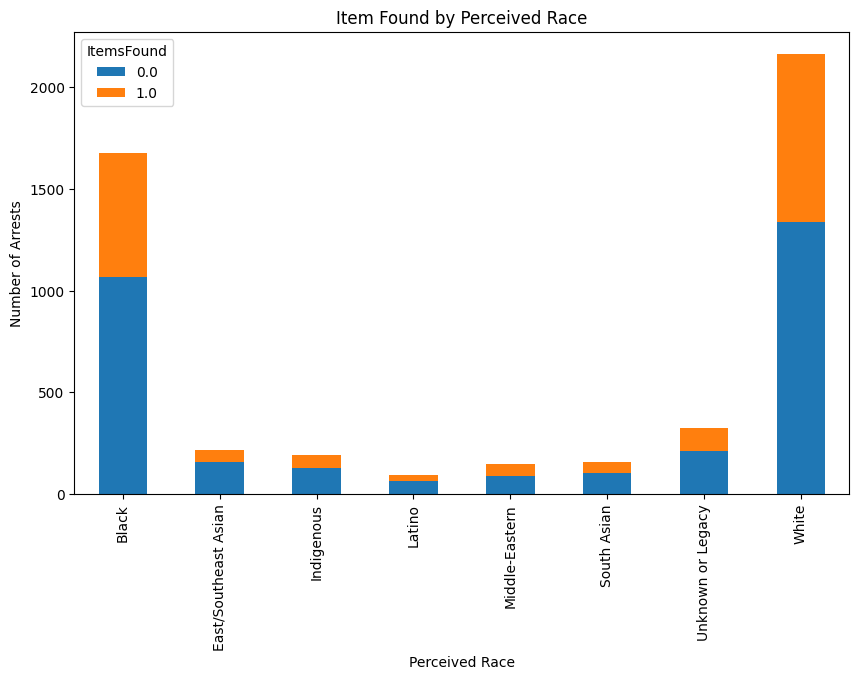

In [36]:
# Filter out rows where SearchReason_PossessWeapons is 1 or SearchReason_PossessEvidence is 1
filtered_df = combined_df[(combined_df['SearchReason_PossessWeapons'] == 1) | (combined_df['SearchReason_PossessEvidence'] == 1)]

# Group data by Perceived_Race and ItemsFound, and calculate the count
grouped_df = filtered_df.groupby(['Perceived_Race', 'ItemsFound']).size().reset_index(name='Count')

# Create pivot table with Perceived_Race as rows, ItemsFound as columns, and Count as values
pivot_table = pd.pivot_table(grouped_df, values='Count', index='Perceived_Race', columns='ItemsFound', fill_value=0)

# Create stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Perceived Race')
plt.ylabel('Number of Arrests')
plt.title('Item Found by Perceived Race')

# Display chart
plt.show()


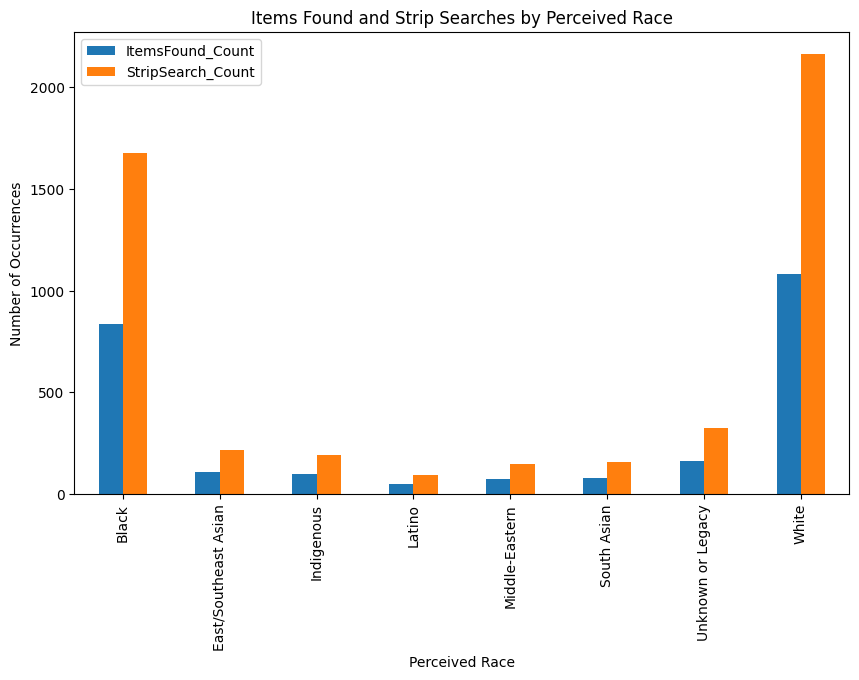

In [37]:
# Filter out rows where SearchReason_PossessWeapons is 1 or SearchReason_PossessEvidence is 1
filtered_df = combined_df[(combined_df['SearchReason_PossessWeapons'] == 1) | (combined_df['SearchReason_PossessEvidence'] == 1)]

# Group data by Perceived_Race and ItemsFound, and calculate the count
grouped_df = filtered_df.groupby(['Perceived_Race', 'ItemsFound']).size().reset_index(name='ItemsFound_Count')

# Group data by Perceived_Race and StripSearch, and calculate the count
grouped_df2 = filtered_df.groupby(['Perceived_Race', 'StripSearch']).size().reset_index(name='StripSearch_Count')

# Create pivot table with Perceived_Race as rows, ItemsFound_Count and StripSearch_Count as columns
pivot_table = pd.pivot_table(grouped_df.merge(grouped_df2, how='outer', on='Perceived_Race'), values=['ItemsFound_Count', 'StripSearch_Count'], index='Perceived_Race', fill_value=0)

# Create grouped bar chart
pivot_table.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Perceived Race')
plt.ylabel('Number of Occurrences')
plt.title('Items Found and Strip Searches by Perceived Race')

# Display chart
plt.show()


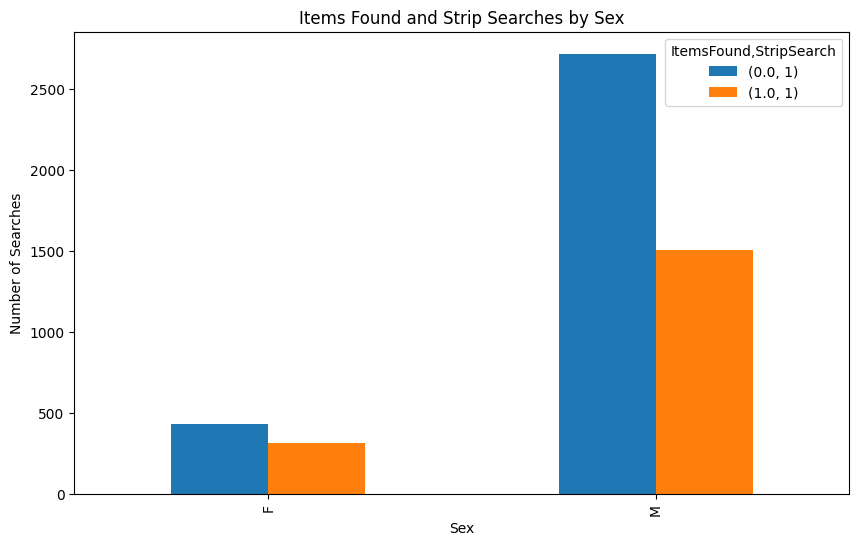

In [38]:
# Filter out rows where SearchReason_PossessWeapons is 1 or SearchReason_PossessEvidence is 1
filtered_df = combined_df[(combined_df['SearchReason_PossessWeapons'] == 1) | (combined_df['SearchReason_PossessEvidence'] == 1)]

# Group data by Sex and ItemsFound/StripSearch, and calculate the count
grouped_df = filtered_df.groupby(['Sex', 'ItemsFound', 'StripSearch']).size().reset_index(name='Count')

# Create pivot table with Sex as rows, ItemsFound/StripSearch as columns, and Count as values
pivot_table = pd.pivot_table(grouped_df, values='Count', index='Sex', columns=['ItemsFound', 'StripSearch'], fill_value=0)

# Create grouped bar chart
pivot_table.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Number of Searches')
plt.title('Items Found and Strip Searches by Sex')

# Display chart
plt.show()


In [38]:
new = combined_df[['#St']]



# **Part 3 Power Analysis**

**Sex & Stripsearch**

In [89]:


MS = combined_df[combined_df['Sex'] == 'M']['#StripSearch']
FS = combined_df[combined_df['Sex'] == 'F']['#StripSearch']
n_ms = len(MS)
n_fs = len(FS)
print('n_ms', n_ms)
print('n_fs', n_fs)
u_ms = np.mean(MS)
u_fs = np.mean(FS)
print('u_ms', u_ms)
print('u_fs', u_fs)
var_ms = np.std(MS, ddof=1)
var_fs = np.std(FS, ddof=1)
print('var_ms', var_ms)
print('var_fs', var_fs)
pooled_s = sqrt(((n_ms - 1) * var_ms + (n_fs - 1) * var_fs) / (n_ms + n_fs - 2))
print("Pooled standard deviation", pooled_s)
cohens_d = (u_ms - u_fs) / pooled_s
print("Cohen's D", cohens_d)


n_ms 52650
n_fs 12617
u_ms 0.7507692307692307
u_fs 0.6369977015138305
var_ms 1.6628809370518218
var_fs 1.4869291392444435
Pooled standard deviation 1.2762714099276882
Cohen's D 0.08914367929141842


In [92]:
from statsmodels.stats.power import TTestIndPower

MS = combined_df[combined_df['Sex'] == 'M']['#StripSearch']
FS = combined_df[combined_df['Sex'] == 'F']['#StripSearch']
n_ms = len(MS)
n_fs = len(FS)

effect_size = cohens_d_1
alpha = 0.05
power = 0.8
ratio = n_ms / n_fs
print('Effect size (Cohen\'s D) for sex & Stripsearch:', effect_size) 

analysis = TTestIndPower()
sample_size1 = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio, alpha=alpha)
sample_size2 = ratio * sample_size1

print('Sample size of nobs1: {:.0f}'.format(sample_size1))
print('Sample size of nobs2: {:.0f}'.format(sample_size2))

# Calculate power for proposed sample size
n_test = analysis.solve_power(effect_size=0.8, nobs1=26325, alpha=0.05, power=None, ratio=ratio)
print('Power: {:.3f}'.format(n_test))



Effect size (Cohen's D) for sex & Stripsearch: 0.0004769191633566116
Sample size of nobs1: 42777199
Sample size of nobs2: 178506739
Power: 1.000


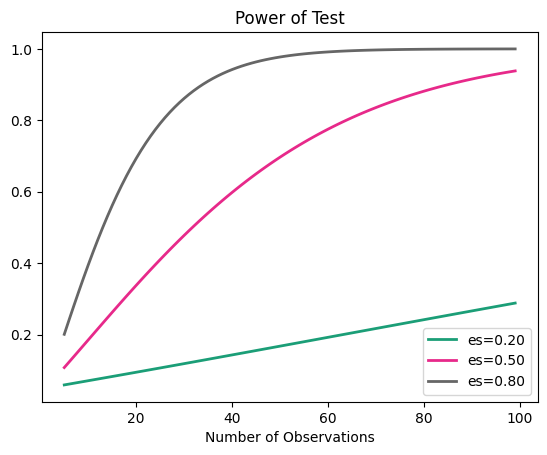

In [41]:
#Power curve
effect_sizes=np.array([0.2,0.5,0.8])
sample_sizes=np.array(range(5,100))
analysis.plot_power(dep_var='nobs',nobs=sample_sizes,effect_size=effect_sizes)
plt.show()

**Age & Stripsearch**

In [42]:
#Age & Stripsearch (Youth vs Adult)
#Cohen's D
AS=combined_df[combined_df['Age_group__at_arrest_'] != '<=17']['#StripSearch'] 
YS=combined_df[combined_df['Age_group__at_arrest_'] == '<=17']['#StripSearch'] 
n_as=len(AS)
n_ys=len(YS)
print('n_as',len(AS)) 
print('n_ys',len(YS))
u_as=np.mean(AS)
u_ys=np.mean(YS)
print('u_as',np.mean(AS)) 
print('u_ys',np.mean(YS))
var_as=np.std(AS,ddof=1)
var_ys=np.std(YS,ddof=1)
print('var_as',np.std(AS,ddof=1))
print('var_ys',np.std(YS,ddof=1))
pooled_s_2=sqrt((n_as-1)*var_as+((n_ys-1)*var_ys)/(u_as+u_ys-2))
print("Pooled standard deviation",pooled_s_2)
cohens_d_2= (u_ms-u_fs)/pooled_s_2
print("Cohen's D",cohens_d_2)

n_as 62234
n_ys 3042
u_as 0.7498634187100299
u_ys 0.29815910585141353
var_as 1.6591860544353292
var_ys 0.752627686875709
Pooled standard deviation 317.571927837463
Cohen's D 0.0003582543647045208


In [43]:
#Coduct power analysis
effect_size2=cohens_d_2
alpha=0.05
power=0.8
ratio_2=n_as/n_ys
print('Effect size(Cohen\'s D)for age & Stripsearch', effect_size2) 
analysis=TTestIndPower()
sample_size2=analysis.solve_power(effect_size2,power=power,nobs1=None,ratio=ratio_2,alpha=alpha)
print('Sample Size of nobs1:%.3f'% sample_size1,'needed for AS')
print('Actual size of AS',n_as)
nobs2=ratio_2*sample_size2
print('Sample Size of nobs2:%.3f'% nobs2,'needed for YS')
print('Actual size of YS',n_ys)
#Testing the power of a proposed sample size
from statsmodels.stats.power import TTestPower
power = TTestPower()
n_test = power.solve_power(nobs=62234, effect_size = 0.8, power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Effect size(Cohen's D)for age & Stripsearch 0.0003582543647045208
Sample Size of nobs1:42777198.898 needed for AS
Actual size of AS 62234
Sample Size of nobs2:1312254150.381 needed for YS
Actual size of YS 3042
Power: 1.000


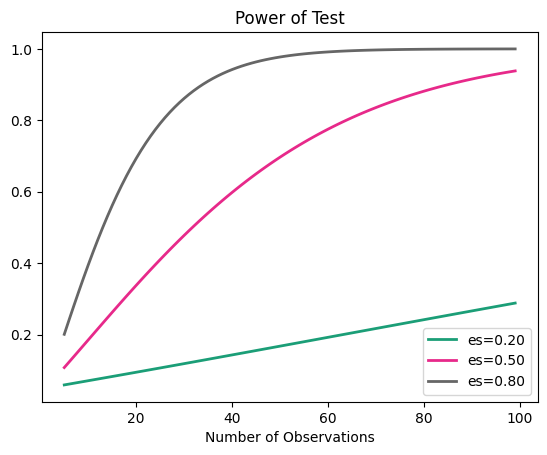

In [44]:
#Power curve
effect_sizes=np.array([0.2,0.5,0.8])
sample_sizes=np.array(range(5,100))
analysis.plot_power(dep_var='nobs',nobs=sample_sizes,effect_size=effect_sizes)
plt.show()

# **Part 4 ANCOVA**

In [45]:
anco_df=combined_df[['#StripSearch','#Arrests','Sex','Age_group__at_arrest_','Perceived_Race','StripSearch','ItemsFound']].copy()
Age_group__at_arrest__mapping={
    '<=17':'Youth',
    '18-24':'Adult',
    '25-34':'Adult',
    '35-44':'Adult',
    '45-54':'Adult',
    '55-64':'Adult',
    '>=64':'Adult'
}
anco_df['Age_group__at_arrest_']=anco_df['Age_group__at_arrest_'].replace(Age_group__at_arrest__mapping)
print(anco_df['Age_group__at_arrest_'].unique())#categorical variable
print(anco_df['#StripSearch'].unique())#dependent variable
print(anco_df['#Arrests'].unique())#Not a categorical variable
print(anco_df['Sex'].unique())#categorical variable
print(anco_df['Perceived_Race'].unique())#categorical variable

['Adult' 'Youth' nan]
[ 0  1  2  3  6  5  4  8 10  9 13  7 17 11 12]
[ 1  8  2  4  3 10  5  7 15  9  6 25 14 20 11 21 12 16 30 13 19 22 17 18
 39 26 24 31 27 23 41 32 28 29 54 35 46]
['M' 'F' 'U']
['East/Southeast Asian' 'White' 'Black' 'South Asian' 'Middle-Eastern'
 'Unknown or Legacy' 'Latino' 'Indigenous' nan]


In [46]:
#Sex, #Arrests,#StripSearch
df_lway1=anco_df[['Sex','#StripSearch','#Arrests']].copy()
print(df_lway1.head())
print(df_lway1.info())

ancova(data=df_lway1,dv='#StripSearch',covar='#Arrests', between='Sex')


  Sex  #StripSearch  #Arrests
0   M             0         1
1   F             0         1
2   M             0         1
3   M             1         8
4   M             1         8
<class 'pandas.core.frame.DataFrame'>
Int64Index: 65276 entries, 0 to 65275
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sex           65276 non-null  object
 1   #StripSearch  65276 non-null  int64 
 2   #Arrests      65276 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.0+ MB
None


,Source,SS,DF,F,p-unc,np2
0,Sex,29.492530,2,11.857729,0.000007,0.000363
1,#Arrests,92330.818219,1,74244.819080,0.000000,0.532157
2,Residual,81172.225100,65272,NaN,NaN,NaN


In [47]:
#Age, #Arrests,#StripSearch
df_lway2=anco_df[['Age_group__at_arrest_','#StripSearch','#Arrests']].copy()
print(df_lway2.head())
print(df_lway2.info())

ancova(data=df_lway2,dv='#StripSearch',covar='#Arrests', between='Age_group__at_arrest_')


  Age_group__at_arrest_  #StripSearch  #Arrests
0                 Adult             0         1
1                 Youth             0         1
2                 Adult             0         1
3                 Adult             1         8
4                 Adult             1         8
<class 'pandas.core.frame.DataFrame'>
Int64Index: 65276 entries, 0 to 65275
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age_group__at_arrest_  65252 non-null  object
 1   #StripSearch           65276 non-null  int64 
 2   #Arrests               65276 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.0+ MB
None


,Source,SS,DF,F,p-unc,np2
0,Age_group__at_arrest_,29.371083,1,23.609695,0.000001,0.000362
1,#Arrests,91841.718885,1,73826.184267,0.000000,0.530837
2,Residual,81171.475609,65249,NaN,NaN,NaN


In [48]:
#Race, #Arrests, #StripSearch
df_lway3=anco_df[['Perceived_Race','#StripSearch','#Arrests']].copy()
print(df_lway3.head())
print(df_lway3.info())

ancova(data=df_lway3,dv='#StripSearch',covar='#Arrests', between='Perceived_Race')



         Perceived_Race  #StripSearch  #Arrests
0  East/Southeast Asian             0         1
1                 White             0         1
2                 White             0         1
3                 White             1         8
4                 White             1         8
<class 'pandas.core.frame.DataFrame'>
Int64Index: 65276 entries, 0 to 65275
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Perceived_Race  65272 non-null  object
 1   #StripSearch    65276 non-null  int64 
 2   #Arrests        65276 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.0+ MB
None


,Source,SS,DF,F,p-unc,np2
0,Perceived_Race,302.833339,7,34.901853,5.594845e-49,0.003730
1,#Arrests,88861.670038,1,71689.789470,0.000000e+00,0.523464
2,Residual,80895.469419,65263,NaN,NaN,NaN


# **Part 5 Logistic Regression**

In [85]:
X = combined_df[['#Arrests', '#StripSearch', '#ItemsFound', 'Sex', 'Perceived_Race']].copy()

X = pd.get_dummies(X, columns=['Perceived_Race','Sex'], drop_first=True)
y = combined_df[['StripSearch']].copy()
y = pd.get_dummies(combined_df.StripSearch, drop_first=True)



In [86]:
new_names = {'#Arrests': 'NoOfArrests', '#StripSearch': 'NoOfStripSearch', '#ItemsFound': 'NoOfItemsFound',
              'Perceived_Race_East/Southeast Asian': 'Southeast_Asian',
             'Perceived_Race_Indigenous': 'Indigenous', 'Perceived_Race_Latino': 'Latino',
             'Perceived_Race_Middle-Eastern': 'Middle_Eastern', 'Perceived_Race_South Asian': 'South_Asian',
             'Perceived_Race_Unknown or Legacy': 'Unknown_or_Legacy_dummy', 'Perceived_Race_White': 'White'}

X = X.rename(columns=new_names)


In [87]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65276 entries, 0 to 65275
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NoOfArrests              65276 non-null  int64  
 1   NoOfStripSearch          65276 non-null  int64  
 2   NoOfItemsFound           65276 non-null  float64
 3   Southeast_Asian          65276 non-null  uint8  
 4   Indigenous               65276 non-null  uint8  
 5   Latino                   65276 non-null  uint8  
 6   Middle_Eastern           65276 non-null  uint8  
 7   South_Asian              65276 non-null  uint8  
 8   Unknown_or_Legacy_dummy  65276 non-null  uint8  
 9   White                    65276 non-null  uint8  
 10  Sex_M                    65276 non-null  uint8  
 11  Sex_U                    65276 non-null  uint8  
dtypes: float64(1), int64(2), uint8(9)
memory usage: 4.6 MB


In [63]:
# Split these data into training and testing datasets
#set random seed for replicability 
#you may want to consider stratifying your train test split (creates splits by preserving the same percentage for each target class as in the complete set.)
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=123)

In [64]:
y_train

,1
20960,0
64139,0
10799,0
1378,0
41430,0
...,...
61404,0
17730,0
28030,0
15725,1


In [68]:
from sklearn.linear_model import LogisticRegression
# Create a DataFrame with only the selected predictors and the response variable
X_train = x_train[['NoOfArrests', 'NoOfStripSearch', 'NoOfItemsFound', 'Sex_M', 'Sex_U', 'Southeast_Asian', 'Indigenous', 'Latino', 'Middle_Eastern', 'South_Asian', 'Unknown_or_Legacy_dummy', 'White']]


# Train the model using Ridge regularization
log_reg_1 = LogisticRegression(penalty='l2', solver='liblinear', random_state=0).fit(X_train, y_train)

# Print the model coefficients
print('Intercept: ', log_reg_1.intercept_[0])
print('Coefficients: ', log_reg_1.coef_[0])

Intercept:  -2.1332683002662653
Coefficients:  [-0.32900039  1.39338968 -0.0769542   0.14883811 -0.78688818 -0.44050933
 -0.05660327 -0.36748965 -0.46203763 -0.42568407 -0.17342113 -0.03745126]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
import statsmodels.formula.api as smf

# Create the formula string 
all_columns = ' + '.join(X)
formula = "y_train ~ " + all_columns 

# Put the training predictors and responses into one DataFrame to be input into the model
trainingdata = pd.concat([x_train,y_train], axis = 1)

# Build the model
log_reg_1 = smf.logit(formula, data=trainingdata).fit()

# Print the summary table of the model
print(log_reg_1.summary())

         Current function value: 0.274085
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                y_train   No. Observations:                52220
Model:                          Logit   Df Residuals:                    52207
Method:                           MLE   Df Model:                           12
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.2517
Time:                        19:43:12   Log-Likelihood:                -14313.
converged:                      False   LL-Null:                       -19128.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.1358      0.047    -45.112      0.000      -2.229      -2.043
NoOfArrests               

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [70]:

log_reg_1.summary()
     

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                y_train   No. Observations:                52220
Model:                          Logit   Df Residuals:                    52207
Method:                           MLE   Df Model:                           12
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.2517
Time:                        19:43:33   Log-Likelihood:                -14313.
converged:                      False   LL-Null:                       -19128.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.1358      0.047    -45.112      0.000      -2.229      -2.043
NoOfArrests                -0.3291      0.007    -48.124      0.000      -0.343      -0.316
NoOfStripSearch             1.3943      0.022     64.072      0.000       1.352       1.437
NoOfItemsFound             -0.0772      0.023     -3.345      0.001      -0.122      -0.032
Sex_M                       0.1512      0.042      3.622      0.000       0.069       0.233
Sex_U                     -19.5071   9976.290     -0.002      0.998   -1.96e+04    1.95e+04
Southeast_Asian            -0.4424      0.075     -5.922      0.000      -0.589      -0.296
Indigenous                 -0.0568      0.097     -0.583      0.560      -0.248       0.134
Latino                     -0.3713      0.112     -3.305      0.001      -0.591      -0.151
Middle_Eastern             -0.4650      0.088     -5.265      0.000      -0.638      -0.292
South_Asian                -0.4283      0.083     -5.142      0.000      -0.592      -0.265
Unknown_or_Legacy_dummy    -0.1728      0.064     -2.680      0.007      -0.299      -0.046
White                      -0.0369      0.037     -0.989      0.323      -0.110       0.036
===========================================================================================
"""

In [72]:
#another way 
reg = smf.logit('y_train ~ NoOfArrests + NoOfStripSearch + NoOfItemsFound + Sex_M + Sex_U + Southeast_Asian + Indigenous + Latino + Middle_Eastern + South_Asian + Unknown_or_Legacy_dummy + White', data=trainingdata).fit()
print(reg.summary())

         Current function value: 0.274085
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                y_train   No. Observations:                52220
Model:                          Logit   Df Residuals:                    52207
Method:                           MLE   Df Model:                           12
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.2517
Time:                        19:43:59   Log-Likelihood:                -14313.
converged:                      False   LL-Null:                       -19128.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.1358      0.047    -45.112      0.000      -2.229      -2.043
NoOfArrests               

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [73]:
params = reg.params
conf = reg.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


,Lower CI,Upper CI,OR
Intercept,0.107675,0.129633,1.181450e-01
NoOfArrests,0.709965,0.729257,7.195464e-01
NoOfStripSearch,3.863659,4.207698,4.032011e+00
NoOfItemsFound,0.884761,0.968533,9.256998e-01
Sex_M,1.071845,1.262449,1.163250e+00
Sex_U,0.000000,inf,3.374325e-09
Southeast_Asian,0.554994,0.743806,6.425010e-01
Indigenous,0.780534,1.143557,9.447669e-01
Latino,0.553512,0.859760,6.898457e-01
Middle_Eastern,0.528272,0.746821,6.281120e-01


In [74]:
import numpy as np
#getting odds ratio 
np.exp(reg.params)

Intercept                  1.181450e-01
NoOfArrests                7.195464e-01
NoOfStripSearch            4.032011e+00
NoOfItemsFound             9.256998e-01
Sex_M                      1.163250e+00
Sex_U                      3.374325e-09
Southeast_Asian            6.425010e-01
Indigenous                 9.447669e-01
Latino                     6.898457e-01
Middle_Eastern             6.281120e-01
South_Asian                6.515977e-01
Unknown_or_Legacy_dummy    8.412781e-01
White                      9.638083e-01
dtype: float64

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Predict responses 
pred_1 = log_reg_1.predict(x_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))

In [76]:
# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))
     


Test accuracy =  0.8886335784313726


In [77]:
# Confusion matrix
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#C0,0 is true negative, C1,0 is false negative, C1,1 is true positive, C0,1 false positive 

cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[11232   273]
 [ 1181   370]]
